## A. Download data 

## B. Load libraries

In [1]:
# Importing the numpy library with the alias 'np' for numerical computations
import numpy as np

# Importing the sys module for system-specific parameters and functions
import sys

# Importing the xarray library with the alias 'xr' for labeled data analysis
import xarray as xr

# Importing the deepcopy function from the copy module for creating deep copies of objects
from copy import deepcopy

# Importing the pyplot module from the matplotlib library for creating data visualizations
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Activating inline plotting in Jupyter Notebook for displaying plots within the notebook itself
%matplotlib inline

# Importing the glob module for file path expansion and searching
import glob

# Importing the warnings module for handling warnings during code execution
import warnings

# Import os to acess USB driver
import os

# Ignoring all warnings that may occur during the execution of the code
# warnings.filterwarnings('ignore')

# load some useful cartopy routines
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
## Import the ecco_v4_py library into Python
# Importing specific functions from the os.path module for path manipulations
from os.path import join, expanduser

# Defining the variable 'user_home_dir' to store the path to the user's home directory
user_home_dir = expanduser('~')

# Appending the path to the ECCOv4-py library to the list of directories where Python looks for modules
sys.path.append(join(user_home_dir, 'ECCOv4-py'))

# Importing the ecco_v4_py library and aliasing it as 'ecco' for ease of use
import ecco_v4_py as ecco

## B. Load model grid

In [3]:
## Set top-level file directory for the ECCO NetCDF files

# Specify the path to your USB drive
usb_drive_path = "/Volumes/Liliana"  # Use the actual name of your USB drive

# Define the ECCO_dir using the join function with the USB drive path
ECCO_dir = os.path.join(usb_drive_path, 'ECCO_V4r4_PODAAC')

# ECCO_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')

In [4]:
# glob.glob is finding files that match a certain pattern in the specified directory (ECCO_dir)
# join is joining the file path and the pattern to search for the files
# The [0] at the end is selecting the first file from the list of found files
# xr.open_dataset is opening the selected file as an xarray dataset, assigning it to the variable ecco_grid
ecco_grid = xr.open_dataset(glob.glob(join(ECCO_dir,'*GEOMETRY*','*.nc'))[0])

In [5]:
## Create a list of the files using glob
# this line finds and stores a list of file paths matching the pattern 'OBP*MONTHLY*' in the directory specified by ECCO_dir.
usb_drive_path = "/Volumes/Liliana"  # Use the actual name of your USB drive
ECCO_dir = os.path.join(usb_drive_path, 'ECCO_V4r4_PODAAC')
OBP_monthly_files = glob.glob(join(ECCO_dir,'*OBP*LLC0090GRID*MONTHLY*','*.nc'))

## This is a function that loads and concatenates multiple files into a single dataset while dropping specified variables.
# loads each file into memory using open_dataset
def ds_load_concat(file_list, dim_concat, vars_to_drop):
    for count, file in enumerate(file_list):
        if count == 0:
            ds_out = xr.open_dataset(file)
            ds_out = ds_out.drop_vars(vars_to_drop)
            # For the first file, it opens it as a dataset and drops specified variables.
        else:
            ds_curr = xr.open_dataset(file)
            # For subsequent files, it opens them as datasets, drops specified variables, and concatenates them.
            ds_curr = ds_curr.drop_vars(vars_to_drop)
            ds_out = xr.concat((ds_out, ds_curr), dim=dim_concat)
    return ds_out

# This line uses the function to create a new dataset 'ds_OBP_monthly' by loading, concatenating, and cleaning the OBP_monthly_files.
ds_OBP_monthly = ds_load_concat(OBP_monthly_files, dim_concat='time', vars_to_drop=['OBPGMAP', 'PHIBOT'])

# This line merges two datasets 'ecco_grid' and 'ds_OBP_monthly' into a single dataset 'ecco_monthly_ds'.
ecco_monthly_ds = xr.merge((ecco_grid, ds_OBP_monthly))

In [6]:
ecco_monthly_ds.OBP

<xarray.DataArray 'OBP' (time: 312, tile: 13, j: 90, i: 90)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 1.52097015e+01,  9.84941769e+00,  1.04831743e+01, ...,
           5.85293121e+01,  5.68698006e+01,  5.63016090e+01],
         [ 1.71106987e+01,  1.43851919e+01,  1.60878429e+01, ...,
           5.87384224e+01,  5.74650421e+01,  5.63260345e+01],
         [ 1.81341782e+01,  1.91870556e+01,  1.96111565e+01, ...,
           5.90578079e+01,  5.85843468e+01,  5.71119614e+01]],

        [[ 1.92179871e+01,  2.20874901e+01,  2.20928745e+01, ...,
           5.90553017e+01,  5.88204918e+01,  5.75598946e+01],
         [ 2.01745262e+01,  2.09286518e+01,  2.21119328e+01, ...,
           5.71040916e+01,  5.73572922e+01,  5.69197197e+01],
         [ 1.98279171e+01,  1.71801815e+01,  7.41669083e+00, ...,
           5.43491478e+01,  5.43519974e+01,  5.33017654e+01],
...
           1.79626350e+01,  1.69381962e+01,  1.87521935e+01],
         [ 2.44196358e+01,  2.33865013e+01,  3.62289085e+01, ...,
           1.59622850e+01,  1.44514627e+01,  1.44454794e+01],
         [ 2.95530758e+01,  2.49933987e+01,  3.15000648e+01, ...,
           1.92782059e+01,  1.63977051e+01,  1.62527161e+01]],

        [[ 2.87630501e+01,  2.70081940e+01,  2.80836964e+01, ...,
                      nan,             nan,             nan],
         [ 2.98534470e+01,  2.85401421e+01,  2.92748890e+01, ...,
                      nan,             nan,             nan],
         [ 2.98113079e+01,  2.94534130e+01,  3.10125675e+01, ...,
                      nan,             nan,             nan],
         ...,
         [ 2.05259457e+01,  2.03476105e+01,  1.86849766e+01, ...,
                      nan,             nan,             nan],
         [ 1.49284801e+01,  1.71629829e+01,  1.82933331e+01, ...,
                      nan,             nan,             nan],
         [ 1.65121593e+01,  1.70599499e+01,  1.71507130e+01, ...,
                      nan,             nan,             nan]]]],
      dtype=float32)
Coordinates:
  * i        (i) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int32 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 -111.6 -111.3 -110.9 ... -99.42 -105.6 -111.9
    YC       (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
  * time     (time) datetime64[ns] 2003-04-16 ... 2002-03-16T12:00:00
Attributes:
    long_name:              Ocean bottom pressure given as equivalent water t...
    units:                  m
    coverage_content_type:  modelResult
    comment:                OBP excludes the contribution from global mean at...
    valid_min:              -1.7899188995361328
    valid_max:              72.07011413574219

In [7]:
ecco_monthly_ds = ecco_monthly_ds.sortby('time')
print(ecco_monthly_ds.time[0].values)
print(ecco_monthly_ds.time[-1].values)

1992-01-16T18:00:00.000000000
2017-12-16T06:00:00.000000000


## Total ocean surface area (k = 0 and z = -5 m)

In [8]:
# Computing ocean mask based on wetness of grid cells
# Using the 'ceiling' function to convert non-zero values to 1
# and leaving 0 values unchanged, indicating dry cells
ocean_mask = np.ceil(ecco_monthly_ds.hFacC)

# Replacing non-one values in the ocean mask with NaN
# This ensures that dry cells are represented as NaN in the mask
ocean_mask = ocean_mask.where(ocean_mask==1, np.nan)

In [9]:
# Select the land_c variable at index 0 in the 'k' dimension
# This selects the first layer of the ocean mask for calculation
# rA is the area of tracer grid cell
total_ocean_area = np.sum(ecco_monthly_ds.rA*ocean_mask[0,:])

# Print the total ocean surface area in square kilometers
# Convert the printed value to scientific notation with 2 decimal places
print('total ocean surface area (km^2) %.2E' % (total_ocean_area.values/1.0e6))

total ocean surface area (km^2) 3.58E+08


## OBP(t) - Global 

Ocean bottom pressure (OBP) given as equivalent water thickness. It refers to the pressure exerted by the weight of the ocean above the sea floor. This pressure is a crucial component in understanding ocean dynamics and the movement of water masses. OBP is influenced by various factors such as ocean currents, tides, and atmospheric conditions.

In [10]:
## OBP(t) - Global 

In [11]:
OBP_global_mean_mon = (ecco_monthly_ds.OBP*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
NEW = (ecco_monthly_ds.OBP)  - OBP_global_mean_mon
NEW_2 = NEW - NEW.mean(dim=['time'])

# Calculate the squared differences from the mean
squared_diff = (NEW_2*100) ** 2

# Calculate the mean of squared differences
mean_squared_diff = squared_diff.mean(dim='time')

# Calculate the standard deviation
std_dev_pb_ecco = np.sqrt(mean_squared_diff)


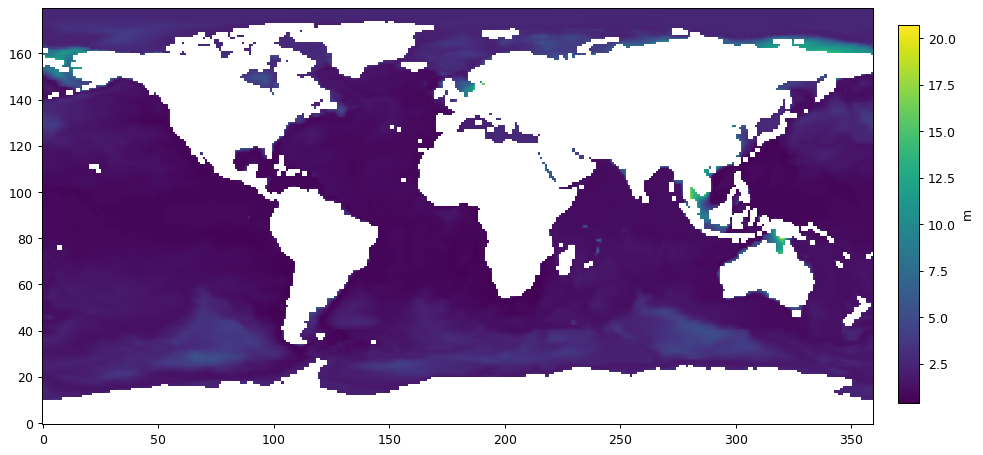

In [12]:
new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

new_grid_lon_centers, new_grid_lat_centers,\
new_grid_lon_edges, new_grid_lat_edges,\
field_nearest_1deg =\
        ecco.resample_to_latlon(std_dev_pb_ecco.XC, \
                                std_dev_pb_ecco.YC, \
                                std_dev_pb_ecco.values,\
                                new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,\
                                new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,\
                                fill_value = np.NaN, \
                                mapping_method = 'nearest_neighbor',
                                radius_of_influence = 120000)


# plot the whole field
fig, ax = plt.subplots(figsize=(12, 6), dpi=90)
im = ax.imshow(field_nearest_1deg, origin='lower')

# Add a colorbar to the plot without overlapping the main plot
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(im, cax=cbar_ax)
cbar.set_label('m')


# Show the plot
plt.show()

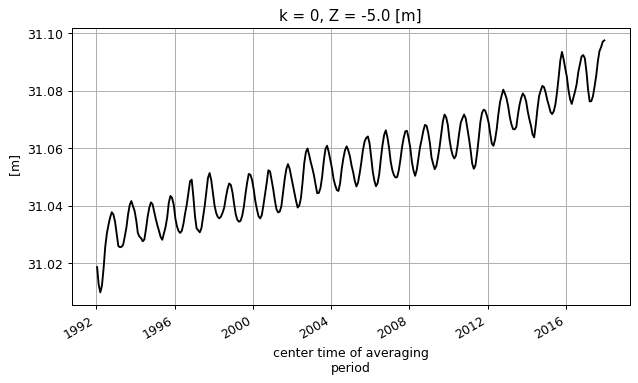

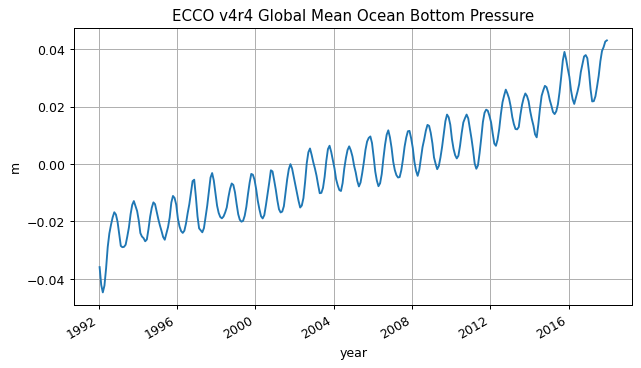

In [13]:
# note no need to multiple RAC by land_c because OBP is nan over land
OBP_global_mean_mon = (ecco_monthly_ds.OBP*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area
# remove time mean from time series
OBP_global_mean_mon_anomaly = OBP_global_mean_mon-OBP_global_mean_mon.mean(dim='time') 

# unit label and plot
plt.figure(figsize=(8,4), dpi= 90)
plt.grid()
OBP_global_mean_mon.attrs['units']='m'
OBP_global_mean_mon.plot(color='k')

plt.figure(figsize=(8,4), dpi= 90)
OBP_global_mean_mon_anomaly.plot()
plt.grid()
plt.title('ECCO v4r4 Global Mean Ocean Bottom Pressure');
plt.ylabel('m');
plt.xlabel('year');

## OBP(i)

In [14]:
# where (i) are there more variations in relation to the global mean?

In [15]:
MDT = (ecco_monthly_ds.OBP - OBP_global_mean_mon).mean(dim=['time'])

In [16]:
## Before plotting the MDT field remove its spatial mean since its spatial mean conveys no dynamically useful information.
MDT_no_spatial_mean = MDT - MDT*ecco_monthly_ds.rA/total_ocean_area

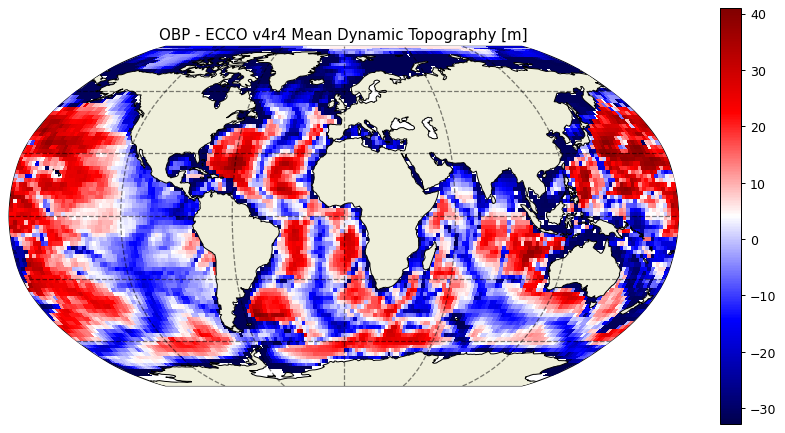

In [17]:
plt.figure(figsize=(12,6), dpi= 90)
MDT_no_spatial_mean = MDT_no_spatial_mean.where(ocean_mask[0,:] !=0)

# Plot projected data onto a latitude-longitude grid
# using the plot_proj_to_latlon_grid method of ecco dataset.
# This method plots the data in MDT_no_spatial_mean multiplied by ocean_mask at k=0.

ecco.plot_proj_to_latlon_grid(
    ecco_monthly_ds.XC,  # X coordinates for the plot
    ecco_monthly_ds.YC,  # Y coordinates for the plot
    MDT_no_spatial_mean * ocean_mask.isel(k=0),  # Data to be plotted at k=0, masked by ocean_mask
    user_lon_0=0,  # User-defined longitude
    plot_type='pcolormesh',  # Type of plot, in this case, pseudocolor mesh
    cmap='seismic',  # Color map for the plot
    show_colorbar=True,  # Display colorbar on the plot
    dx=2,  # Grid spacing in the x direction
    dy=2  # Grid spacing in the y direction
)

plt.title('OBP - ECCO v4r4 Mean Dynamic Topography [m]');

## OBP(t) - Portugal Region

In [18]:
# Set the tile number and time index
tile_num = 2
time_ind = 49

new_grid_delta_lat = 0.05
new_grid_delta_lon = 0.05

new_grid_min_lat = 30
new_grid_max_lat = 50

new_grid_min_lon = -35
new_grid_max_lon = 5

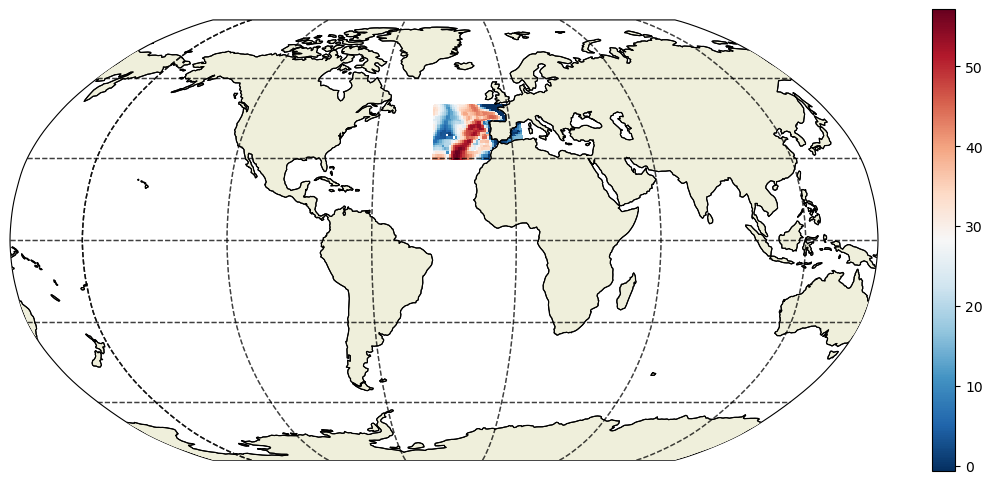

In [19]:
lat_bounds = np.logical_and(ecco_monthly_ds.OBP.YC  > new_grid_min_lat, ecco_monthly_ds.OBP.YC < new_grid_max_lat)
lon_bounds = np.logical_and(ecco_monthly_ds.OBP.XC  > new_grid_min_lon, ecco_monthly_ds.OBP.XC < new_grid_max_lon)
lat_lon_bounds = np.logical_and(lat_bounds, lon_bounds)
obp_pt_subset_space = ecco_monthly_ds.OBP.where(lat_lon_bounds, np.nan)
fig=plt.figure(figsize=(14, 6))

ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, ecco_monthly_ds.YC, \
                              obp_pt_subset_space.isel(time=time_ind),\
                              dx=.5, dy=.5,user_lon_0 = -30,\
                              show_colorbar=True);

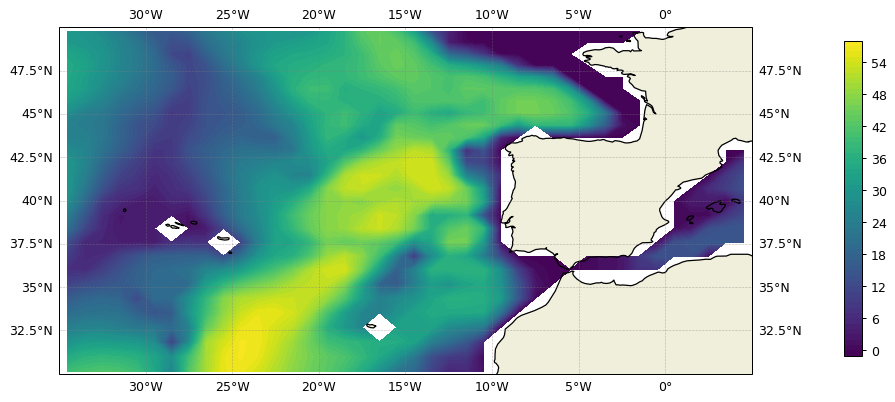

In [20]:
# Extract longitudes and latitudes for the specified tile
lons = ecco_monthly_ds.XC.isel(tile=tile_num)
lats = ecco_monthly_ds.YC.isel(tile=tile_num)

# Extract the data for the specified tile and time index
tile_to_plot = ecco_monthly_ds.OBP.isel(tile=tile_num, time=time_ind)

# Apply a mask to the data, replacing values with NaN where XC is outside the range 
tile_to_plot = tile_to_plot.where((ecco_monthly_ds.XC.isel(tile=tile_num) < new_grid_max_lon) & 
                                 (ecco_monthly_ds.XC.isel(tile=tile_num) > new_grid_min_lon) &
                                 (ecco_monthly_ds.YC.isel(tile=tile_num) < new_grid_max_lat) &
                                 (ecco_monthly_ds.YC.isel(tile=tile_num) > new_grid_min_lat), np.nan)

# Create a figure with a specified size and dpi
fig = plt.figure(figsize=(10, 5), dpi=90)

# Set the projection for the plot as Plate Carrée
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the desired axis range
ax.set_extent([new_grid_min_lon, new_grid_max_lon, new_grid_min_lat, new_grid_max_lat], crs=ccrs.PlateCarree())

# Plot the data on the defined axes, specifying the transformation to be Plate Carrée
cf = plt.contourf(lons, lats, tile_to_plot, 60, transform=ccrs.PlateCarree())

# Add gridlines on the plot with specified properties
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Add coastlines to the plot
ax.coastlines()

# Add land feature to the plot
ax.add_feature(cfeature.LAND)

# Add a colorbar to the plot without overlapping the main plot
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
plt.colorbar(cf,ax=ax,cax=cbar_ax)

## OBP(t) - Global - Portugal Region

In [21]:
# Portugal region - area
ocean_mask_new = ocean_mask.where(
    (ocean_mask.YC > new_grid_min_lat) & (ocean_mask.YC < new_grid_max_lat) & (ocean_mask.XC > new_grid_min_lon) & (ocean_mask.XC < new_grid_max_lon),
    np.nan,
)
total_ocean_area_pt = np.sum(ecco_monthly_ds.rA*ocean_mask_new[0,:])

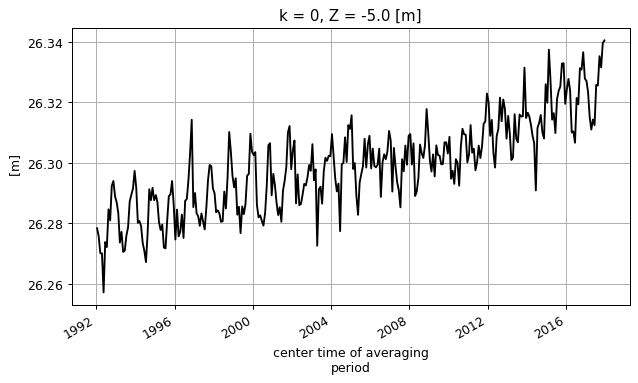

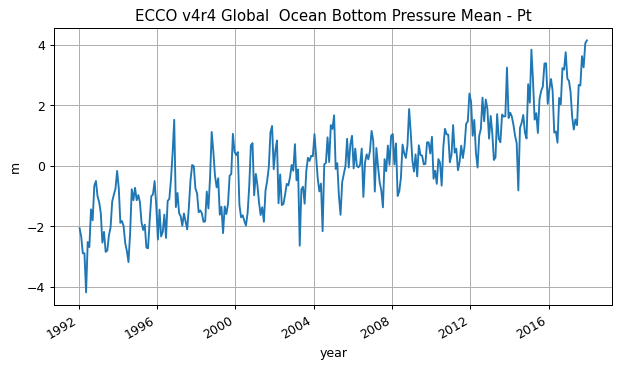

In [22]:
# note no need to multiple RAC by land_c because OBP is nan over land
OBP_global_mean_mon_pt = (obp_pt_subset_space*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area_pt
# remove time mean from time series
OBP_global_mean_mon_anomaly_pt = (OBP_global_mean_mon_pt-OBP_global_mean_mon_pt.mean(dim='time'))*100

# unit label and plot
plt.figure(figsize=(8,4), dpi= 90)
plt.grid()
OBP_global_mean_mon_pt.attrs['units']='m'
OBP_global_mean_mon_pt.plot(color='k')

plt.figure(figsize=(8,4), dpi= 90)
OBP_global_mean_mon_anomaly_pt.plot()
plt.grid()
plt.title('ECCO v4r4 Global  Ocean Bottom Pressure Mean - Pt');
plt.ylabel('m');
plt.xlabel('year');

## OBP(i) - Mean - Global - Portugal Region

(<Figure size 1080x540 with 2 Axes>,
 <GeoAxes: >,
 array([[-179., -177., -175., ...,  175.,  177.,  179.],
        [-179., -177., -175., ...,  175.,  177.,  179.],
        [-179., -177., -175., ...,  175.,  177.,  179.],
        ...,
        [-179., -177., -175., ...,  175.,  177.,  179.],
        [-179., -177., -175., ...,  175.,  177.,  179.],
        [-179., -177., -175., ...,  175.,  177.,  179.]]),
 array([[-89., -89., -89., ..., -89., -89., -89.],
        [-87., -87., -87., ..., -87., -87., -87.],
        [-85., -85., -85., ..., -85., -85., -85.],
        ...,
        [ 85.,  85.,  85., ...,  85.,  85.,  85.],
        [ 87.,  87.,  87., ...,  87.,  87.,  87.],
        [ 89.,  89.,  89., ...,  89.,  89.,  89.]]),
 masked_array(
   data=[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [na

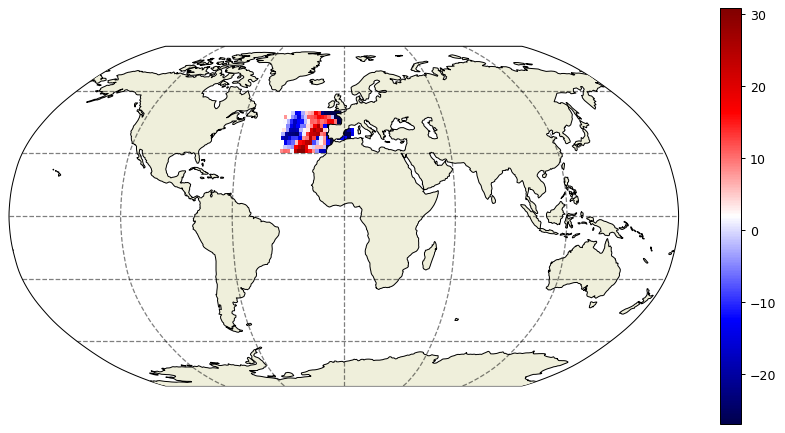

In [23]:
MDT_pt = (obp_pt_subset_space - OBP_global_mean_mon_pt).mean(dim=['time'])
## Before plotting the MDT field remove its spatial mean since its spatial mean conveys no dynamically useful information.
MDT_no_spatial_mean_pt = MDT_pt - MDT_pt*ecco_monthly_ds.rA/total_ocean_area_pt

plt.figure(figsize=(12,6), dpi= 90)
# Plot projected data onto a latitude-longitude grid
# using the plot_proj_to_latlon_grid method of ecco dataset.
# This method plots the data in MDT_no_spatial_mean multiplied by ocean_mask at k=0.

ecco.plot_proj_to_latlon_grid(
    ecco_monthly_ds.XC,  # X coordinates for the plot
    ecco_monthly_ds.YC,  # Y coordinates for the plot
    MDT_no_spatial_mean_pt * ocean_mask_new.isel(k=0),  # Data to be plotted at k=0, masked by ocean_mask
    user_lon_0=0,  # User-defined longitude
    plot_type='pcolormesh',  # Type of plot, in this case, pseudocolor mesh
    cmap='seismic',  # Color map for the plot
    show_colorbar=True,  # Display colorbar on the plot
    dx=2,  # Grid spacing in the x direction
    dy=2  # Grid spacing in the y direction
)

<Figure size 600x500 with 0 Axes>

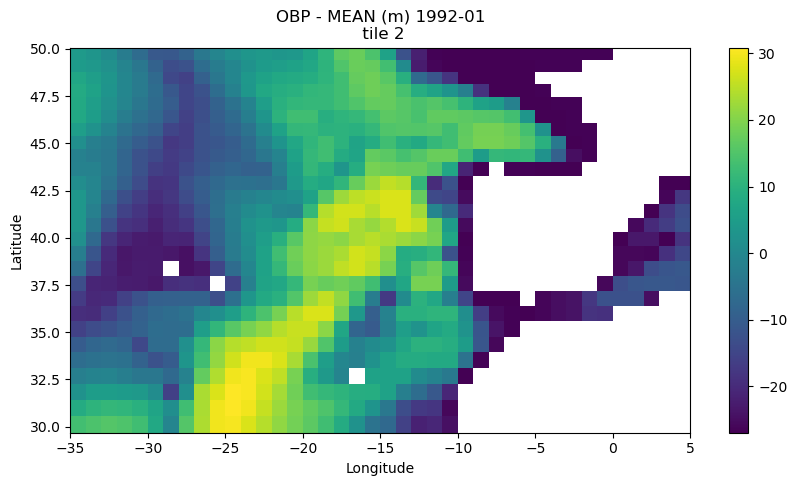

In [24]:
plt.figure(figsize=(6,5), dpi= 100)

# Step 1, select the tile to plot using the **.isel( )** syntax.
MDT_no_spatial_mean_pt = MDT_no_spatial_mean_pt * ocean_mask_new.isel(k=0)
MDT_no_spatial_mean_pt = MDT_no_spatial_mean_pt.isel(tile=tile_num)
# Apply a mask to the data, replacing values with NaN where XC is outside the range 
MDT_no_spatial_mean_pt = MDT_no_spatial_mean_pt.where(
    (ecco_monthly_ds.XC.isel(tile=tile_num) < new_grid_max_lon) & 
    (ecco_monthly_ds.XC.isel(tile=tile_num) > new_grid_min_lon) &
    (ecco_monthly_ds.YC.isel(tile=tile_num) < new_grid_max_lat) &
    (ecco_monthly_ds.YC.isel(tile=tile_num) > new_grid_min_lat),
    drop=True  # Set drop argument to True to remove coordinates along which the condition is not satisfied
)

# plt.pcolormesh()
plt.figure(figsize=(10,5), dpi=100)
x = MDT_no_spatial_mean_pt.XC
y = MDT_no_spatial_mean_pt.YC
plt.pcolormesh(x, y, MDT_no_spatial_mean_pt, shading='auto')
plt.colorbar()
plt.title('OBP - MEAN (m) ' + str(ecco_monthly_ds.time[0].values)[0:7] + '\n tile 2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## OBP (i = 10,j), time_i =49

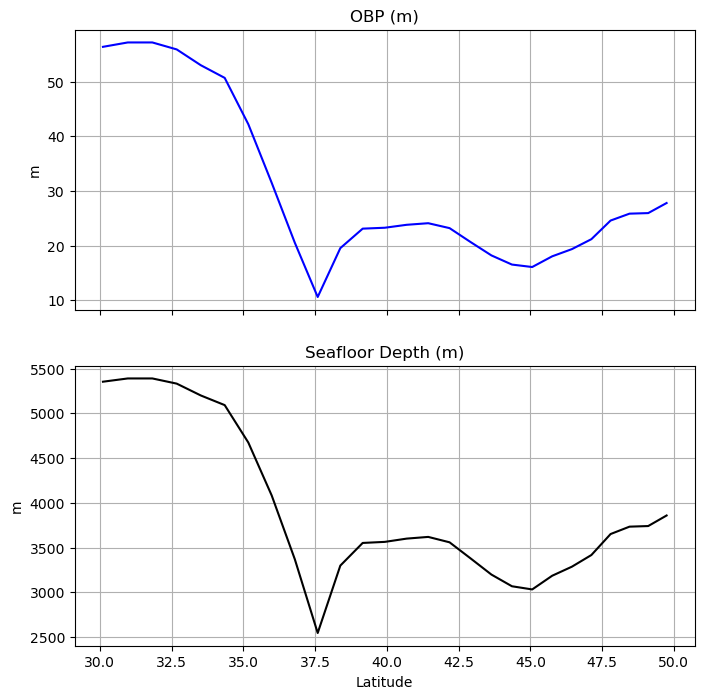

In [25]:
# selected zone
i_index = 10
obp_pt_study  =  ecco_monthly_ds.OBP.where(lat_lon_bounds, drop=True)
obp_pt_study = obp_pt_study.isel(time=time_ind, i = i_index, tile= 0).load()
depth_pt=  ecco_monthly_ds.Depth.where(lat_lon_bounds, drop=True)
depth_pt=  depth_pt.isel(i = i_index, tile= 0).load()

f, axarr = plt.subplots(2, sharex=True, figsize=(8, 8))
(ax1, ax2) = axarr
ax1.plot(obp_pt_study.YC, obp_pt_study.values, color='b')
ax1.set_ylabel('m')
ax1.set_title('OBP (m)')
ax1.grid()

ax2.plot(obp_pt_study.YC, depth_pt.values, color='k')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('m')
ax2.set_title('Seafloor Depth (m)')
ax2.grid()

plt.show()